<a href="https://colab.research.google.com/github/eryyyj/openCVCrashCourse/blob/main/Activity%205/PISALBON_Activity_5_Line_and_Circle_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO.** | **TITLE**
**Name** | Pisalbon, Ery Jay P.
**Section** | CPE32S3
**Date Performed**: | 02/21/2025
**Date Submitted**: | 02/21/2025
**Instructor**: | Dr. Jonathan V. Taylar / Engr. Verlyn V. Nojor / Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


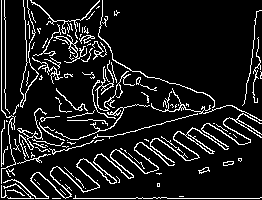

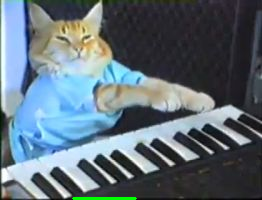

In [2]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

keycatpath = '/content/drive/MyDrive/Image/Act 5 Images/Keyboard_cat.jpg'
img = cv2.imread(keycatpath)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?
<br> <br>
the line of code that is responsible for setting the minimum line lenght in the HoughLinesP function is the minLineLength variable which sets the minimum threshold to 20<br><br>
2. What is the mathematical formula for Hough transform and explain how it finds lines.<br><br>
the mathematical formula that is used for hough transform is based on the parametric representation of a line which is y = mx+c but that formula is not ideal because it will be undefined if we have vertical lines so that function now uses the polar representation of the line to address the said issues p= xcos(theta) + ysin(theta) <br><br>

the hough transform finds lines by first doing an edge detection algorithm and all of the edge captured will be transformed into hough space and after the transformation, an accumulator matrix is created where it contains 2 axis one for the rho (distance from the origin) and theta (angle created from the x-axis)
which each edges will vote on for possible lines

### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

HoughCircles is a function in openCv that detects circular shapes of a given image with the use of Hough Circle Transform algorithm, the common parameters of this functions are your grayscale input image, the detection method you will be using, the inverse ratio of accumulator resolution to image resolution, the minimum distance between detected circle centers, param 1 (the upper threshold for canny edge detection), param 2 for the threshold of the accumulator, and the min and max radius for a circle to be detected

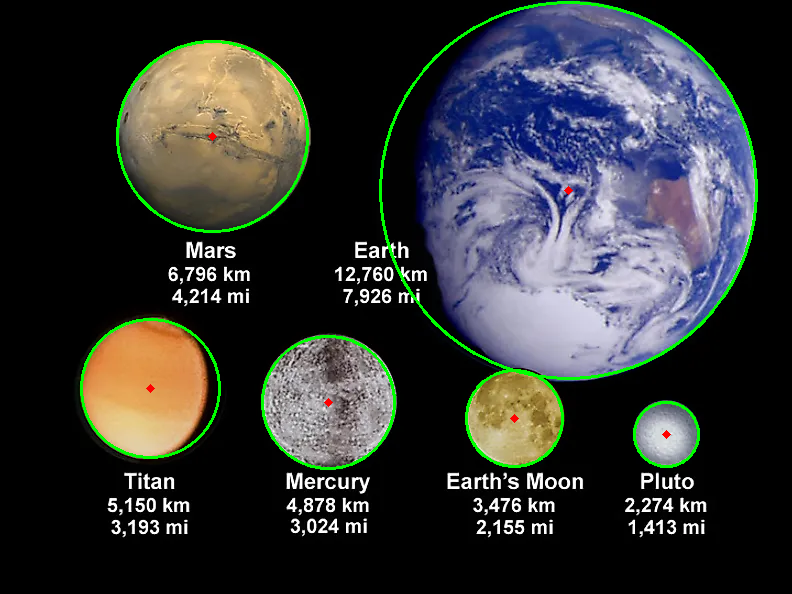

In [14]:
import cv2
import numpy as np

# Our testing value
n = 19
ppath = '/content/drive/MyDrive/Image/Act 5 Images/planets.jpg'
planets = cv2.imread(ppath)
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("/content/drive/MyDrive/Image/Act 5 Images/planets_circles_19.jpg", planets)
cv2_imshow(planets)

What happens to the code once you run **and the value of n is 5**?

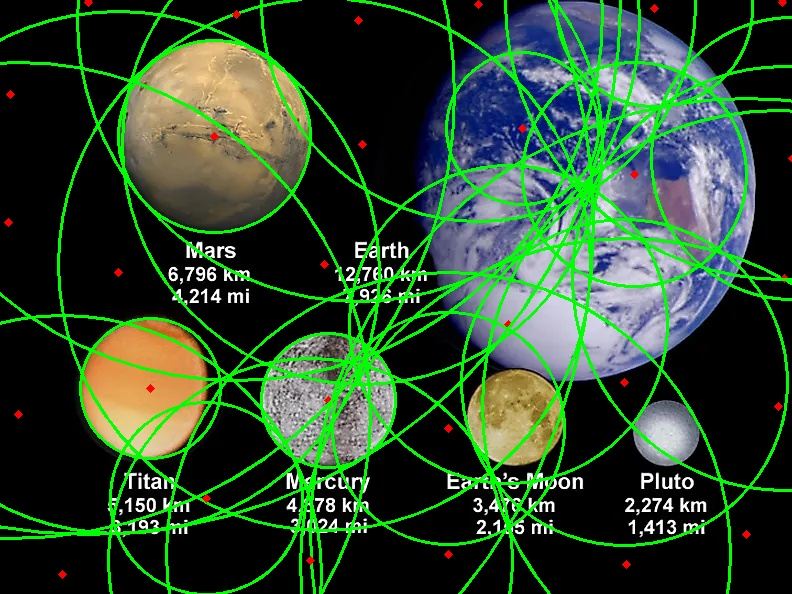

In [9]:
p5 = cv2.imread('/content/drive/MyDrive/Image/Act 5 Images/planets_circles_5.jpg')
cv2_imshow(p5)

Change the value to 9, **what happens to the image**?

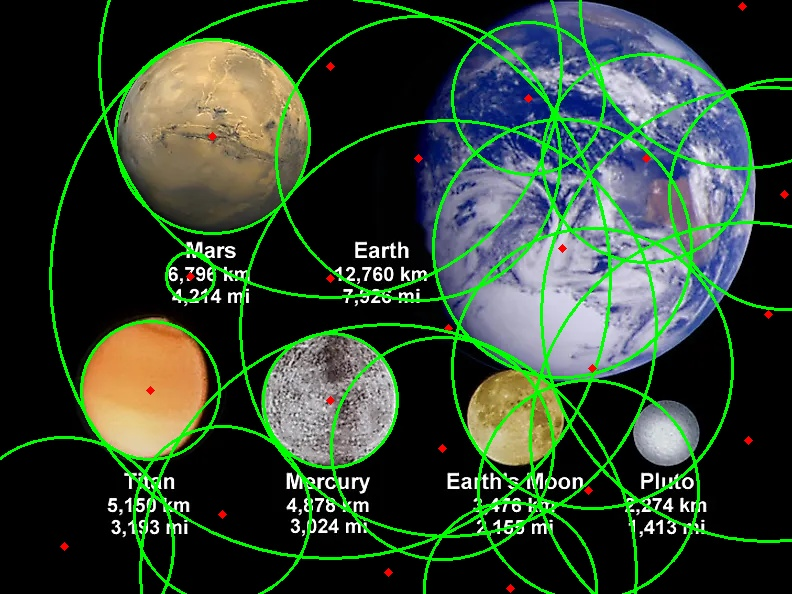

In [10]:
p9 = cv2.imread('/content/drive/MyDrive/Image/Act 5 Images/planets_circles_9.jpg')
cv2_imshow(p9)

Lastly, change the value to 15, **what can you say about the resulting image?**

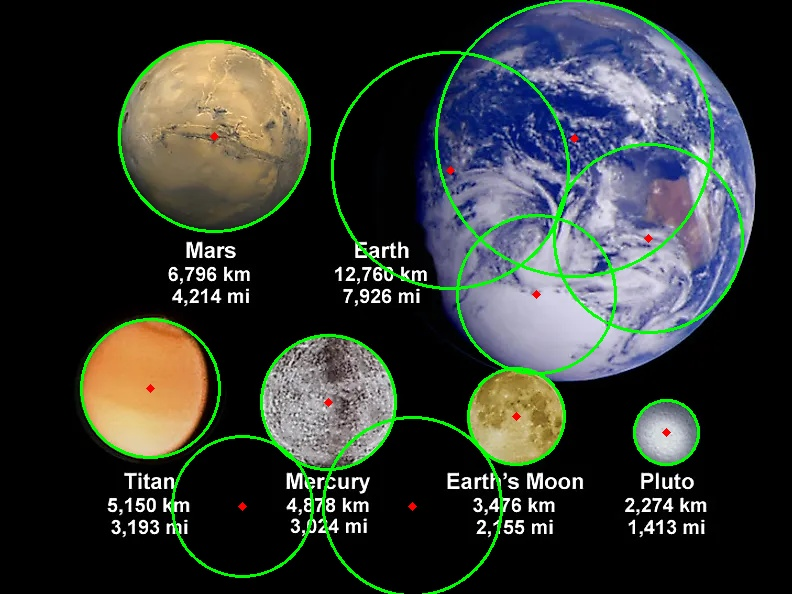

In [13]:
p15 = cv2.imread('/content/drive/MyDrive/Image/Act 5 Images/planets_circles_15.jpg')
cv2_imshow(p15)

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

based on the given output that we experimented on the number of testing values, I have analyzed that putting a low number of testing values results to more messy and more number of circles detected by the HoughCircles function, but when we increase the value we inputted, it will reduce the number of circles detected which shows a much more cleaner output

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

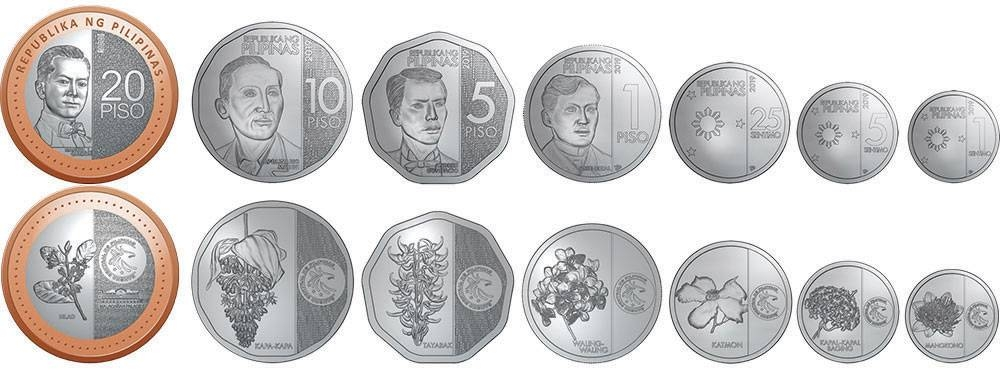

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

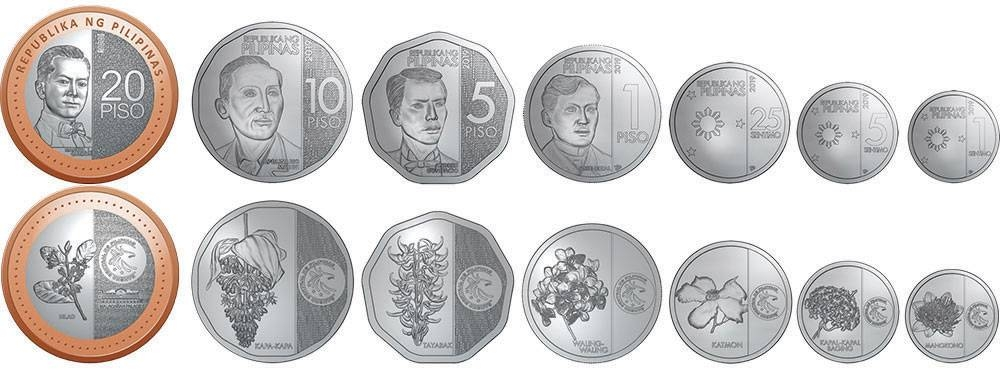

In [25]:
supp_coin_path = '/content/drive/MyDrive/Image/Act 5 Images/supp_coin.jpg'
coin_img = cv2.imread(supp_coin_path)
cv2_imshow(coin_img)

In [51]:
# making a function using line detection
def line_detect(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  edges = cv2.Canny(gray, 50, 150)
  lines = cv2.HoughLinesP(edges, 1, np.pi/180,100)

  for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

  cv2_imshow(edges)
  cv2_imshow(img)
  return len(lines)

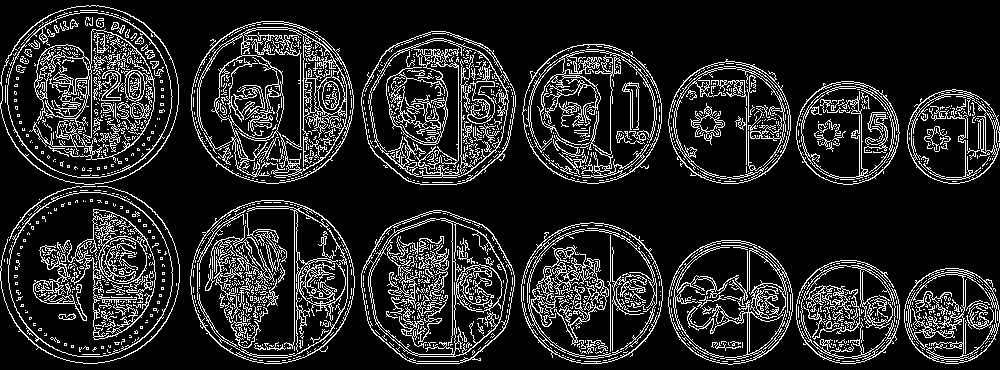

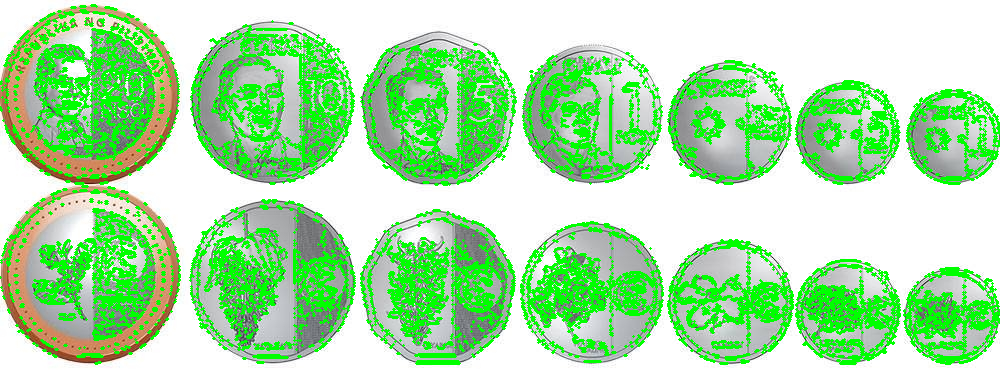

number of lines:  13516


In [52]:
numlines = line_detect(coin_img)
print('number of lines: ', numlines)

Based on what I have got on the line detection we can use the HoughlinesP fucntion to detect lines on our images but we need to careful on what parameters to used as per my output of my image detected too many lines (13516 line) it detected too much noise on the image I have inputted

In [71]:
# coin count using houghscircles function
def coin_count(impath,testing_num):
  img = cv2.imread(impath)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blur = cv2.medianBlur(gray,testing_num)
  circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, dp=1.1, minDist=40, param1=80, param2=30, minRadius=20, maxRadius=100)

  if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
      cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
      cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

  cv2_imshow(img)
  return len(circles[0])

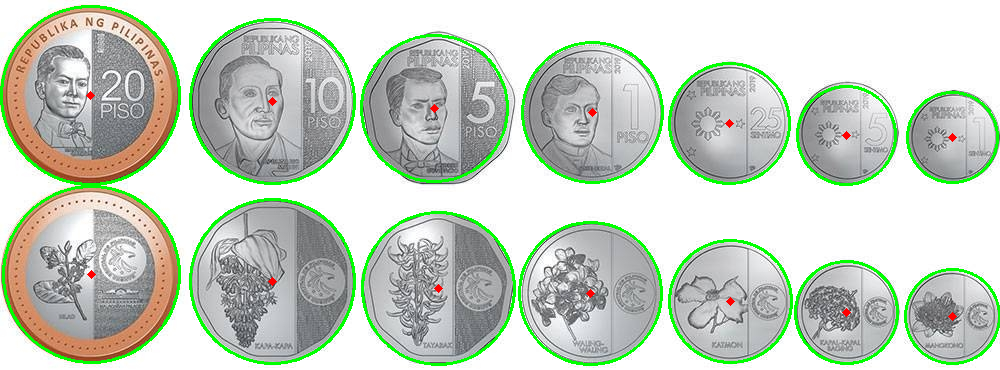

number of coins detected:  14


In [72]:
numcoin = coin_count(supp_coin_path, 21)
print('number of coins detected: ', numcoin)

based on the output shown on my code we can say that we can use houghcircles to count the circles of any image but just like I said earlier we need to be careful or we need to experiment on paramter values so that the function will properly detect the circles and will show a satisfying output

## 5. Summary, Conclusions and Lessons Learned

In this hands-on activity I have learned about the detection of lines and circles on our images, I also learned how the previous lessons like edge detection and grayscaling images can help us in detecting the lines and circles on our images, I have learned how will our computer detect lines by using the hough transform and hough circle from the open cv packge. I have learned that Hough transform uses polar coordinates in detecting lines and both function for hough transform and hough circle will go through the same voting system in detecting lines or circles. by applying what I learned in this activity, I can make project based on object detection, image segmentation coin denomination detection, and many more

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*